In [ ]:
import numpy as np 
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [ ]:
df.shape

(1460, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [ ]:
df.duplicated().sum()

7

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum().any()

False

In [ ]:
X = df.iloc[:, :10].values
y = df.iloc[:, 10].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from collections import Counter 
print(X_train.shape)
print(Counter(y_train))

(1162, 10)
Counter({1: 592, 0: 570})


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [ ]:
X_train_scaled = sc_X.fit_transform(X_train) 
X_test_scaled = sc_X.transform(X_test) 

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, input_shape=(10,), activation='softplus'))
# model.add(keras.layers.Dense(32, activation='softplus'))
model.add(keras.layers.Dense(16, activation='softplus'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
results = model.fit(
  x=X_train_scaled,
  y=y_train,
  shuffle=True,
  epochs=30,
  batch_size=16,
  validation_data=(X_test_scaled, y_test)

)

Epoch 1/30
73/73 [==============================] - 2s 14ms/step - loss: 0.6708 - binary_accuracy: 0.6601 - val_loss: 0.5603 - val_binary_accuracy: 0.8247
Epoch 2/30
73/73 [==============================] - 0s 7ms/step - loss: 0.5260 - binary_accuracy: 0.8666 - val_loss: 0.4684 - val_binary_accuracy: 0.8832
Epoch 3/30
73/73 [==============================] - 1s 7ms/step - loss: 0.4513 - binary_accuracy: 0.8744 - val_loss: 0.3935 - val_binary_accuracy: 0.8935
Epoch 4/30
73/73 [==============================] - 0s 6ms/step - loss: 0.3897 - binary_accuracy: 0.8804 - val_loss: 0.3362 - val_binary_accuracy: 0.8900
Epoch 5/30
73/73 [==============================] - 0s 6ms/step - loss: 0.3448 - binary_accuracy: 0.8804 - val_loss: 0.2987 - val_binary_accuracy: 0.8866
Epoch 6/30
73/73 [==============================] - 0s 7ms/step - loss: 0.3143 - binary_accuracy: 0.8804 - val_loss: 0.2706 - val_binary_accuracy: 0.8935
Epoch 7/30
73/73 [==============================] - 1s 8ms/step - loss: 0.2

In [ ]:
eval = model.evaluate(x=X_test_scaled, y=y_test)


10/10 [==============================] - 0s 5ms/step - loss: 0.2120 - binary_accuracy: 0.9175


Text(0, 0.5, 'Losses')

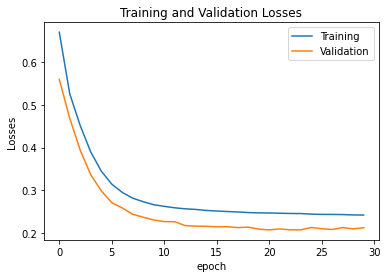

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')

In [ ]:
# plt.plot(results.history['accuracy'])
# plt.plot(results.history['val_accuracy'])
# plt.legend(['Training', 'Validation'])
# plt.title('Training and Validation accuracy')
# plt.xlabel('epoch')
# plt.ylabel('Accuracy')

Text(0, 0.5, 'accuarcy')

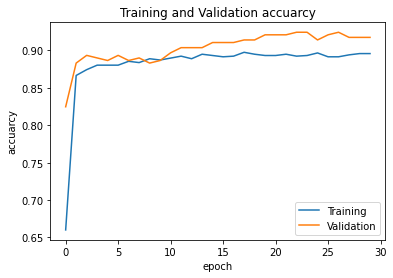

In [ ]:
plt.plot(results.history['binary_accuracy'])
plt.plot(results.history['val_binary_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuarcy')
plt.xlabel('epoch')
plt.ylabel('accuarcy')


In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________
